<a href="https://colab.research.google.com/github/JangAyeon/ToBigs/blob/master/%5B4%5DEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install catboost

# **Load Data**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")


from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import svm

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

In [ ]:
df=pd.read_csv("ggstore_train.csv")
df_test=pd.read_csv("ggstore_test.csv")

In [ ]:
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [ ]:
df_test.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Dr.Android Repair Master 2017,PRODUCTIVITY,1205,4.3,100000.0,0,0.00,Everyone,Productivity,2018-06-10,5617
1,DR CONTROL,FAMILY,267,1.5,10000.0,0,0.00,Everyone,Entertainment,2017-03-08,5618
2,Dr Driving Racer,GAME,183,68.0,10000.0,0,0.00,Everyone,Racing,2018-06-14,5619
3,Dr. McDougall Mobile Cookbook,HEALTH_AND_FITNESS,76,1.2,1000.0,1,4.99,Everyone,Health & Fitness,2015-01-26,5620
4,Dr. Seuss's ABC,FAMILY,429,12.0,10000.0,1,3.99,Everyone,Books & Reference;Education,2018-02-26,5621


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


##**1.   Feature**




|Feature 명|설명|
|------|---|
|App|Application name|
|Category|Category the app belongs to Overall user rating of the app (as when scraped)|
|Rating|Overall user rating of the app (as when scraped)|
|Reviews|Number of user reviews for the app (as when scraped)|
|Size|Size of the app (as when scraped)|
|Installs|Number of user downloads/installs for the app (as when scraped)|
|Type|Paid or Free|
|Price|Price of the app (as when scraped)|
|Content Rating|Age group the app is targeted at - Children / Mature 21+ / Adult|
|Genres|An app can belong to multiple genres (apart from its main category)|
|Last Updated|Date when the app was last updated on Play Store (as when scraped)|
|Id|Product Number of Application|

##**2.Target Data** : `Rating`<br>

In [ ]:
target="Rating"
con_var=['Rating','Reviews','Size','Installs','Price']

##**3.Data Size<br>**
5616 rows with 12 columns

In [ ]:
df.shape #train data shape

(5616, 12)

In [ ]:
df_test.shape #test data shape

(1404, 11)

#**결측치 / 이상치 확인 & EDA**

##**1.결측치 존재하지 않음**

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Id                0
dtype: int64

##**2.연속형 변수 분포**

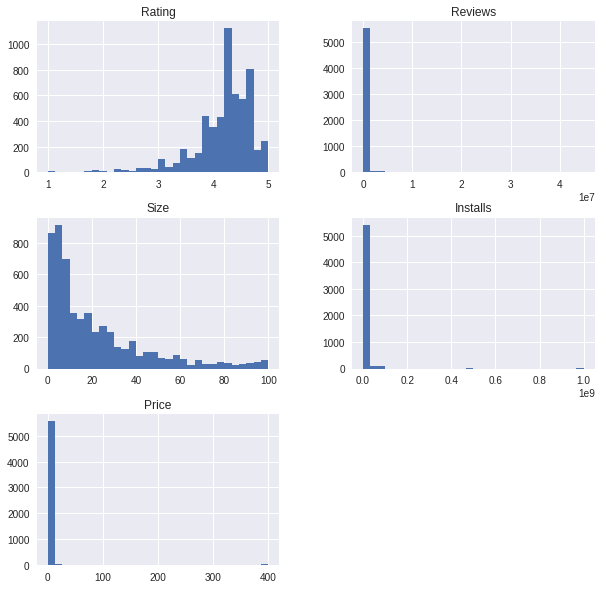

In [ ]:
df[con_var].hist(bins=30,figsize=(10,10)) #hist
plt.show()

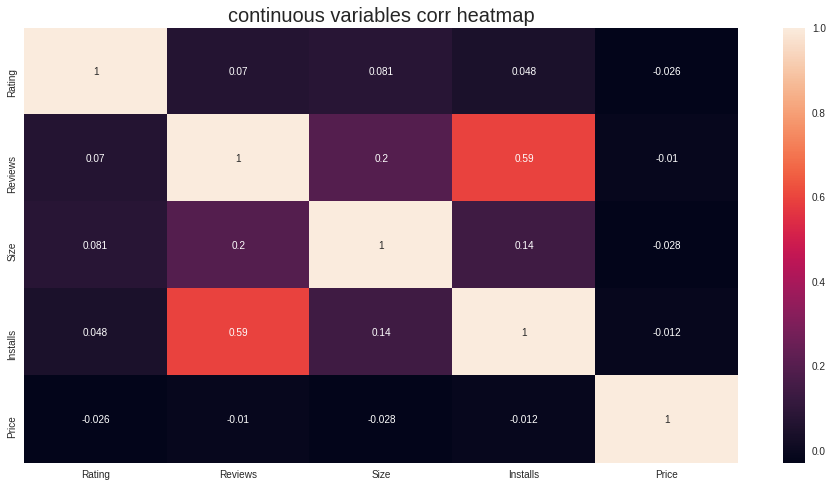

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df[con_var].corr(), annot=True) #heapmap
plt.title('continuous variables corr heatmap', fontsize=20)
plt.show()

##**3.Feature**

###**1.`App`** 
**: Application의 명칭으로 이상치 존재 X**


*   object형으로 차후 Feature Engineering 필요


In [ ]:
df["App"].value_counts() 

Pro 2018 - Series A and B                             1
Freecell CY                                           1
Kaspersky Mobile Antivirus: AppLock & Web Security    1
SketchBook - draw and paint                           1
Go                                                    1
                                                     ..
CS Browser | #1 & BEST BROWSER                        1
Sermon on Proverbs CH Spurgeon                        1
BW-DGS plugin                                         1
AP Mobile                                             1
Home Scouting® MLS Mobile                             1
Name: App, Length: 5616, dtype: int64

###**2.`Category`**
**: Application이 속하는 분류 명칭으로 이상치 존재 X**


*   33가지 / 31가지 분류 존재

*   Game 과 Family 분류가 가장 흔함
*   object형으로 차후 Feature Engineering 필요

In [ ]:
print("#",len(df["Category"].unique()),"number of Categories") ##Application의 종류 train data에 33가지 존재
print(df["Category"].value_counts())

# 33 number of Categories
FAMILY                 1102
GAME                    657
TOOLS                   463
MEDICAL                 253
PERSONALIZATION         227
LIFESTYLE               220
FINANCE                 201
PHOTOGRAPHY             175
PRODUCTIVITY            173
HEALTH_AND_FITNESS      172
BUSINESS                166
COMMUNICATION           153
SPORTS                  143
SHOPPING                139
SOCIAL                  122
DATING                  121
NEWS_AND_MAGAZINES      114
BOOKS_AND_REFERENCE     109
TRAVEL_AND_LOCAL        108
VIDEO_PLAYERS            90
EDUCATION                88
MAPS_AND_NAVIGATION      76
FOOD_AND_DRINK           69
ENTERTAINMENT            64
LIBRARIES_AND_DEMO       57
ART_AND_DESIGN           57
AUTO_AND_VEHICLES        55
HOUSE_AND_HOME           48
COMICS                   46
PARENTING                43
WEATHER                  37
BEAUTY                   34
EVENTS                   34
Name: Category, dtype: int64


Text(0.5, 1.0, 'Distribution of Category')

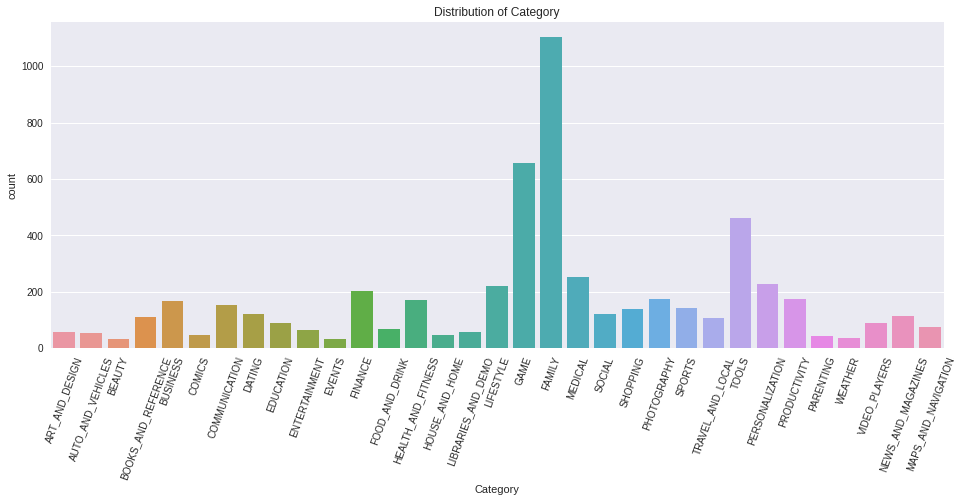

In [ ]:
plt.figure(figsize=(16,6)) ##Application의 분류 분포
sns.countplot(x="Category",data=df)
plt.xticks(rotation=70)
plt.title("Distribution of Category")

In [ ]:
print("#",len(df_test["Category"].unique()),"number of Categories") ##Application의 종류 test data에 31가지 존재
print(df_test["Category"].value_counts())

# 31 number of Categories
FAMILY                 408
GAME                   175
TOOLS                  162
SPORTS                  78
FINANCE                 57
BUSINESS                56
PRODUCTIVITY            50
LIFESTYLE               49
PERSONALIZATION         47
NEWS_AND_MAGAZINES      40
COMMUNICATION           35
SOCIAL                  34
TRAVEL_AND_LOCAL        33
BOOKS_AND_REFERENCE     32
PHOTOGRAPHY             29
VIDEO_PLAYERS           22
HEALTH_AND_FITNESS      19
MAPS_AND_NAVIGATION     18
WEATHER                 13
MEDICAL                 13
AUTO_AND_VEHICLES        8
SHOPPING                 7
EVENTS                   4
LIBRARIES_AND_DEMO       3
FOOD_AND_DRINK           3
BEAUTY                   3
HOUSE_AND_HOME           2
PARENTING                1
ART_AND_DESIGN           1
DATING                   1
COMICS                   1
Name: Category, dtype: int64


Text(0.5, 1.0, 'Distribution of Category')

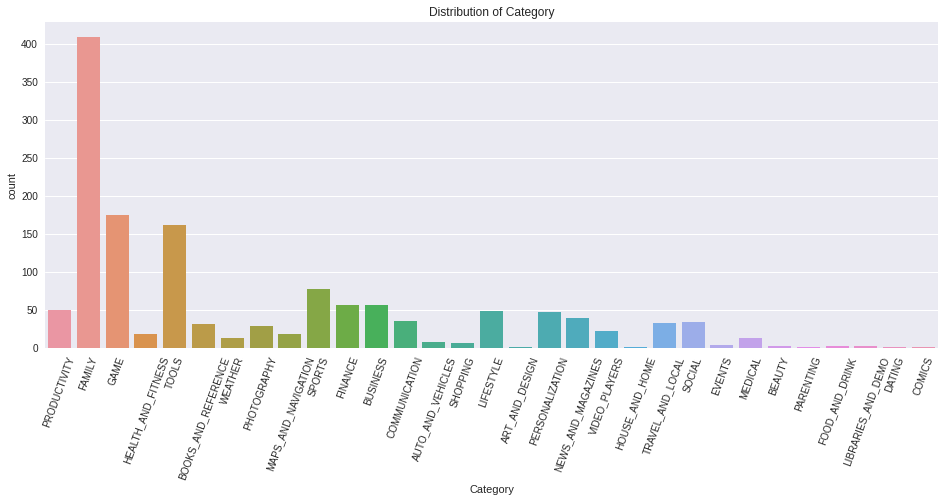

In [ ]:
plt.figure(figsize=(16,6)) ##Application의 분류 분포
sns.countplot(x="Category",data=df_test)
plt.xticks(rotation=70)
plt.title("Distribution of Category")

###**3.`Rating`**
**: Application의 평가지표로 이상치 존재 X**


*   평균적으로 4점대로 평가되며 전반적으로 좋은 평을 받음

In [ ]:
df["Rating"].describe()

count    5616.000000
mean        4.177386
std         0.543153
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

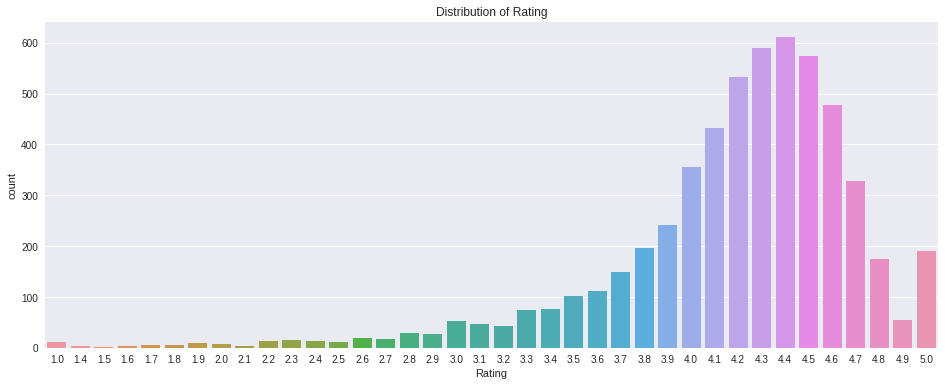

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Rating",data=df)
plt.title("Distribution of Rating")

###**4.`Reviews`**
**: Application의 사용 후기 갯수로 이상치 존재 X**




*   대부분의 어플은 1M개의 리뷰를 가짐 
* 일부 3M~4M개의 리뷰를 가지는 어플이 있지만 인기 어플 등의 경우 충분히 가능한 상황이라고 생각해 이상치로 고려X<br>
=> "Clash of Clans", "DU Battery Saver - Battery Charger & Battery Life", "Need for Speed™ No Limits" 등의 어플의 경우 이에 해당됨 

In [ ]:
df["Reviews"].value_counts() 

3          58
2          55
5          53
4          51
1          51
           ..
3079        1
205830      1
54034       1
1026        1
1385093     1
Name: Reviews, Length: 3697, dtype: int64

In [ ]:
df["Reviews"].describe()

count    5.616000e+03
mean     1.686437e+05
std      1.126012e+06
min      1.000000e+00
25%      1.140000e+02
50%      2.158000e+03
75%      3.292125e+04
max      4.489172e+07
Name: Reviews, dtype: float64

In [ ]:
df[["App","Reviews"]].sort_values(by="Reviews",ascending=False)

,App,Reviews
975,Clash of Clans,44891723
960,Subway Surfers,27722264
965,Clash Royale,23133508
961,Candy Crush Saga,22426677
247,UC Browser - Fast Download Private & Secure,17712922
...,...,...
1440,Anatomy & Physiology Vocabulary Exam Review App,1
4983,CT Checkout,1
3160,Hey AJ! It's Bedtime!,1
3346,AP Art History Flashcards,1


In [ ]:
df_test[["App","Reviews"]].sort_values(by="Reviews",ascending=False)

,App,Reviews
79,DU Battery Saver - Battery Charger & Battery Life,13479633
259,Need for Speed™ No Limits,3344300
279,Modern Combat 5: eSports FPS,2903386
257,EA SPORTS UFC®,2371338
595,Zynga Poker – Texas Holdem,1986068
...,...,...
739,ES Billing System (Offline App),1
316,EB Cash Collections,1
1359,Monster Ride Pro,1
44,PhotoFrame for Synology DS,1


###**5.`Size`**
**: Application의 용량로 이상치 존재 X**




* std 값이 높고 1/4분위 수와 3/4 분위의 수의 차이가 큼<br>
=> 주로 스포츠와 게임 어플의 특성 때문에 다른 분야의 어플보다 극단적으로 용량이 클 수 있음

In [ ]:
df["Size"].describe() #train에서 Size의 분포

count    5616.000000
mean       21.831198
std        22.744877
min         0.008500
25%         5.100000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

In [ ]:
df[["App","Size","Category"]].sort_values(by="Size",ascending=False) #train에서 Size에 따른 내림차순으로 App, Category 정보 나열

,App,Size,Category
607,Post Bank,100.0000,FINANCE
1037,Mini Golf King - Multiplayer Game,100.0000,GAME
5335,Car Crash III Beam DH Real Damage Simulator 2018,100.0000,GAME
3370,The Walking Dead: Our World,100.0000,GAME
3600,Gangster Town: Vice District,100.0000,FAMILY
...,...,...,...
158,Plugin:AOT v5.0,0.0230,BUSINESS
5086,Morse Code Reader,0.0200,COMMUNICATION
2995,Ad Remove Plugin for App2SD,0.0170,PRODUCTIVITY
3000,My baby firework (Remove ad),0.0140,FAMILY


In [ ]:
df_test["Size"].describe() #test에서 Size의 분포

count    1404.000000
mean       21.502735
std        22.688011
min         0.017000
25%         4.000000
50%        12.000000
75%        33.000000
max       100.000000
Name: Size, dtype: float64

In [ ]:
df_test[["App","Size","Category"]].sort_values(by="Size",ascending=False) #test에서 Size에 따른 내림차순으로 App, Category 정보 나열

,App,Size,Category
46,Draft Simulator for FUT 18,100.000,SPORTS
282,Stickman Legends: Shadow Wars,100.000,GAME
910,Eyes - The Scary Horror Game Adventure,99.000,GAME
407,L.A. Crime Stories Mad City Crime,99.000,GAME
545,Exiled Kingdoms RPG,99.000,FAMILY
...,...,...,...
1166,Wi-Fi settings shortcut,0.029,TOOLS
1165,Wi-Fi Rabbit Unlock Key,0.026,TOOLS
585,EM Launcher Pro,0.024,PERSONALIZATION
712,Fill 'er Up,0.018,TRAVEL_AND_LOCAL


###**6.`Installs`**
**: Application의 설치수로 이상치 존재 X**

* std 값이 높고 최대와 최소 값의 차이가 큼<br>
=> "Google News", "Subway Surfers", "Modern Combat 5: eSports FPS", "File Commander - File Manager/Explorer	" 와 같은 인기 어플의 경우 충분히 가능한 수치임


In [ ]:
df["Installs"].describe() #train에서 install 분포

count    5.616000e+03
mean     5.201445e+06
std      3.012485e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
df[["App","Installs"]].sort_values(by="Installs",ascending=False) #train에서 Install을 기준으로 App 내림 차순 정렬

,App,Installs
2115,Google News,1.000000e+09
960,Subway Surfers,1.000000e+09
1827,SHAREit - Transfer & Share,5.000000e+08
3419,Samsung Health,5.000000e+08
1973,Dropbox,5.000000e+08
...,...,...
4853,CQ ESPM,5.000000e+00
1440,Anatomy & Physiology Vocabulary Exam Review App,5.000000e+00
1434,Tablet Reminder,5.000000e+00
1436,KBA-EZ Health Guide,1.000000e+00


In [ ]:
df_test["Installs"].describe() #test에서 install 분포

count    1.404000e+03
mean     1.555711e+06
std      6.736048e+06
min      1.000000e+00
25%      1.000000e+03
50%      5.000000e+04
75%      5.000000e+05
max      1.000000e+08
Name: Installs, dtype: float64

In [ ]:
df_test[["App","Installs"]].sort_values(by="Installs",ascending=False) #test에서 Install을 기준으로 App 내림 차순 정렬

,App,Installs
279,Modern Combat 5: eSports FPS,100000000.0
1023,File Commander - File Manager/Explorer,100000000.0
79,DU Battery Saver - Battery Charger & Battery Life,100000000.0
595,Zynga Poker – Texas Holdem,50000000.0
1141,Talking Tom Bubble Shooter,50000000.0
...,...,...
486,EJ messenger,10.0
190,Chronolink DX,10.0
316,EB Cash Collections,5.0
1222,FK Atlantas,5.0


###**7.`Type`** 
**: 유료 / 무료 여부로 이상치 존재 X**


*   압도적으로 무료(0) 어플 다운로드 수가 더 높음

Text(0.5, 1.0, 'Distribution of Type')

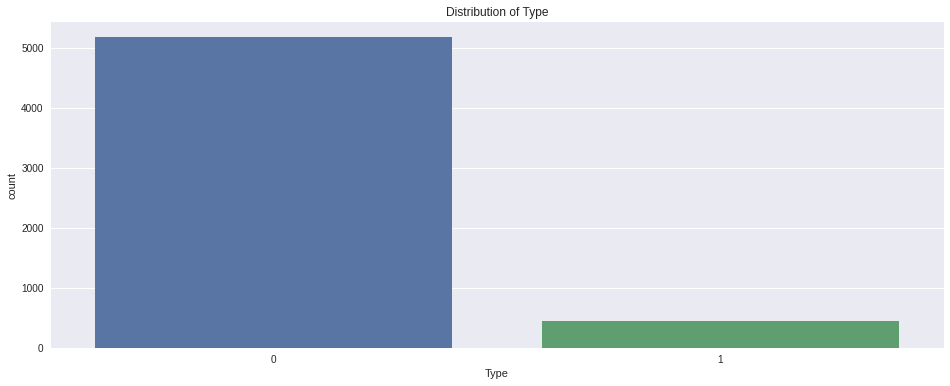

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Type",data=df) #train에서 무료 / 유로 분포
plt.title("Distribution of Type")

Text(0.5, 1.0, 'Distribution of Type')

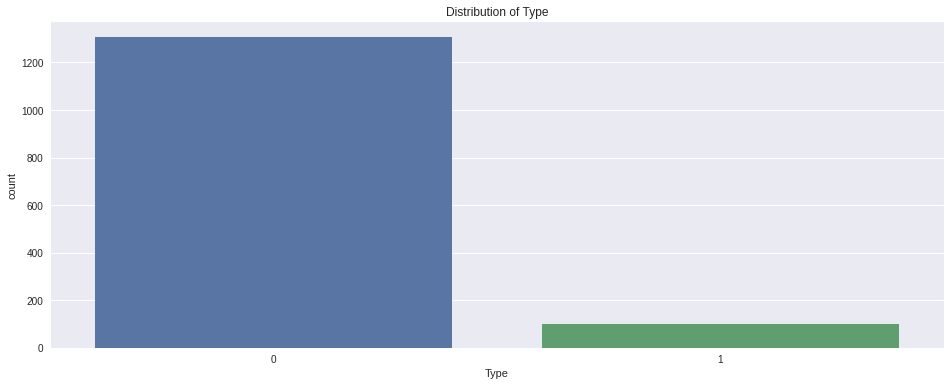

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Type",data=df_test) #test에서 무료 / 유로 분포
plt.title("Distribution of Type")

###**8.`Price`**
**: Application의 가격 이상치 존재 X**
*   3/4분위까지 가격이 0원인 것으로 보아 유료 어플은 극히 일부임
* 유료어플 중에서도 0.99달러, 2.99달러인 어플이 제일 많음
* 400달러가 제일 비싼 어플로 "I'm Rich - Trump Edition", "I AM RICH PRO PLUS" 등은 쓸데없이 돈자랑 인증 어플로 Google Play Store에 있는 일종의 문화라 생각함	

In [ ]:
df["Price"].unique() #train에서 Price 값

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29])

In [ ]:
df["Price"].describe() #train에서 전체 가격의 분포

count    5616.000000
mean        1.409918
std        20.341193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [ ]:
df[df["Price"]>0]["Price"].describe() #train에서 유료 어플의 가격 분포

count    441.000000
mean      17.954875
std       70.586521
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Distribution of Price of not Free Application')

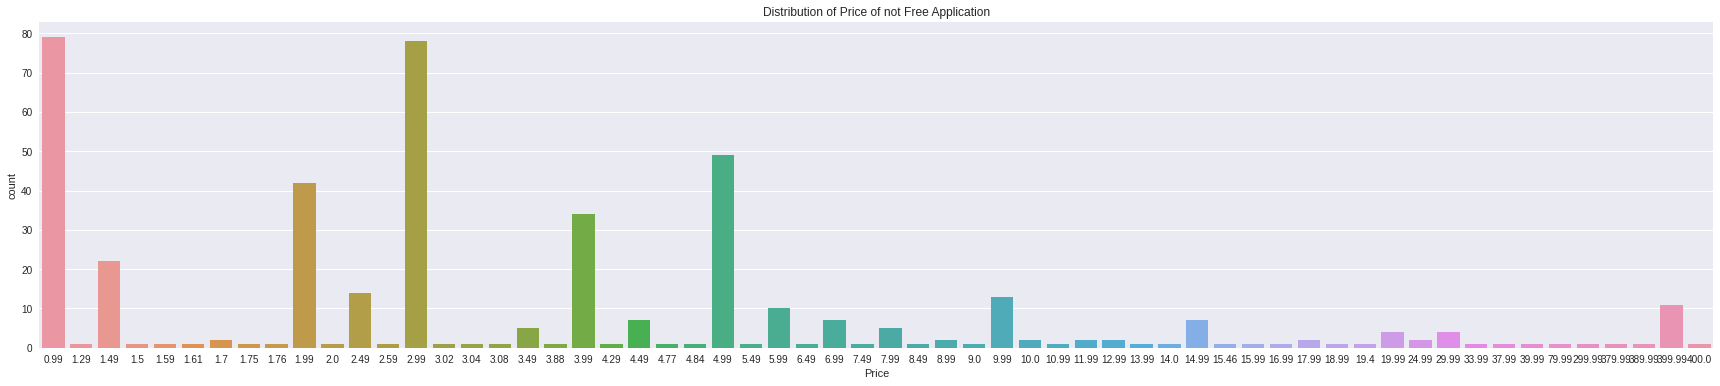

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x="Price",data=df[df["Price"]>0])
plt.title("Distribution of Price of not Free Application")

In [ ]:
df[["App","Price"]].sort_values(by="Price",ascending=False) #train에서 Price을 기준으로 App 내림 차순 정렬

,App,Price
2510,I'm Rich - Trump Edition,400.00
3253,I AM RICH PRO PLUS,399.99
3236,I Am Rich Premium,399.99
3244,I am rich (Most expensive app),399.99
2506,💎 I'm rich,399.99
...,...,...
1900,New Launcher 2018,0.00
1899,"Color Call - Caller Screen, LED Flash",0.00
1898,ZenUI Launcher,0.00
1897,Funny Alarm Clock Ringtones,0.00


In [ ]:
df_test["Price"].describe() #전체 가격의 분포

count    1404.000000
mean        0.232272
std         1.141627
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.990000
Name: Price, dtype: float64

In [ ]:
df_test[df_test["Price"]>0]["Price"].describe() #유료 어플의 가격 분포

count    98.000000
mean      3.327653
std       2.905932
min       0.990000
25%       1.050000
50%       2.990000
75%       3.990000
max      16.990000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Distribution of Price of not Free Application')

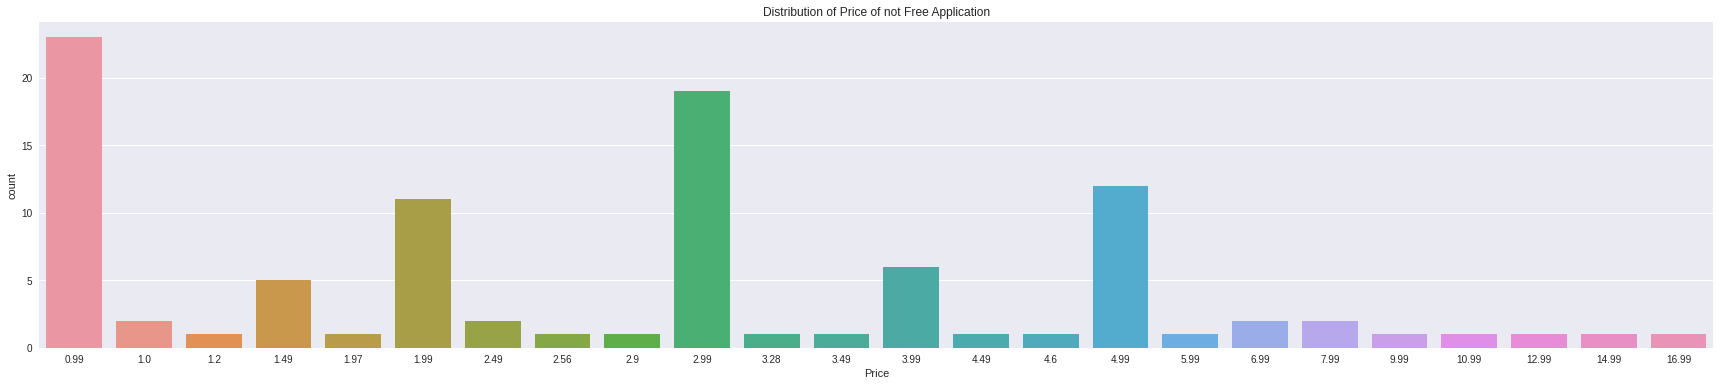

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x="Price",data=df_test[df_test["Price"]>0])
plt.title("Distribution of Price of not Free Application")

In [ ]:
df_test[["App","Price"]].sort_values(by="Price",ascending=False) #test에서 Price을 기준으로 App 내림 차순 정렬

,App,Price
1365,Trine 2: Complete Story,16.99
318,Electrician Calculator Pro,14.99
377,Carrier Landings Pro,12.99
310,RPG ブレイジング ソウルズ アクセレイト,10.99
846,XCOM®: Enemy Within,9.99
...,...,...
485,Bad Piggies HD,0.00
484,Ambulance Rescue Simulator 17,0.00
483,EJ Insight,0.00
482,Super Sport Car Simulator,0.00


###**9.`Content Rating`** 
**: 이용 적정 연령층으로 이상치 존재 X**


*  대부분 전연령층이 사용 가능한 어플
*   object형으로 차후 Feature Engineering 필요

In [ ]:
print("#",len(df["Content Rating"].unique()),"numbers of Content Rating class") #train data
print(df["Content Rating"].unique()) #
print(df["Content Rating"].value_counts())

# 6 numbers of Content Rating class
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Everyone           4531
Teen                589
Mature 17+          281
Everyone 10+        212
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64


Text(0.5, 1.0, 'Distribution of Content Rating')

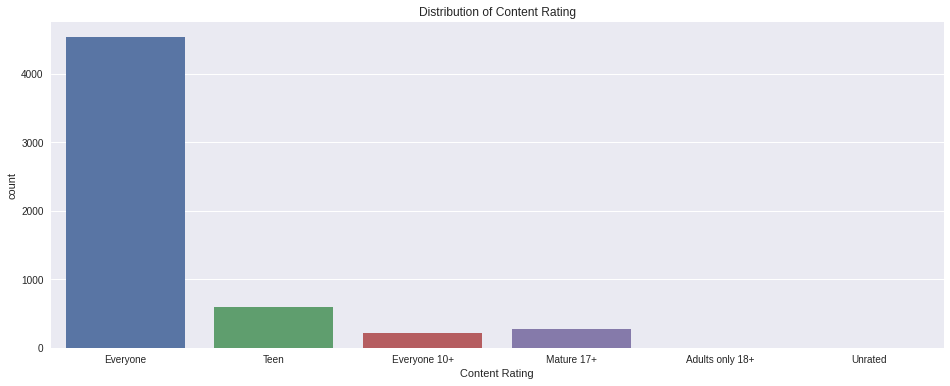

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Content Rating",data=df)
plt.title("Distribution of Content Rating")

In [ ]:
print("#",len(df_test["Content Rating"].unique()),"numbers of Content Rating class") #test data
print(df_test["Content Rating"].unique()) 
print(df_test["Content Rating"].value_counts())

# 4 numbers of Content Rating class
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+']
Everyone        1145
Teen             189
Everyone 10+      47
Mature 17+        23
Name: Content Rating, dtype: int64


Text(0.5, 1.0, 'Distribution of Content Rating')

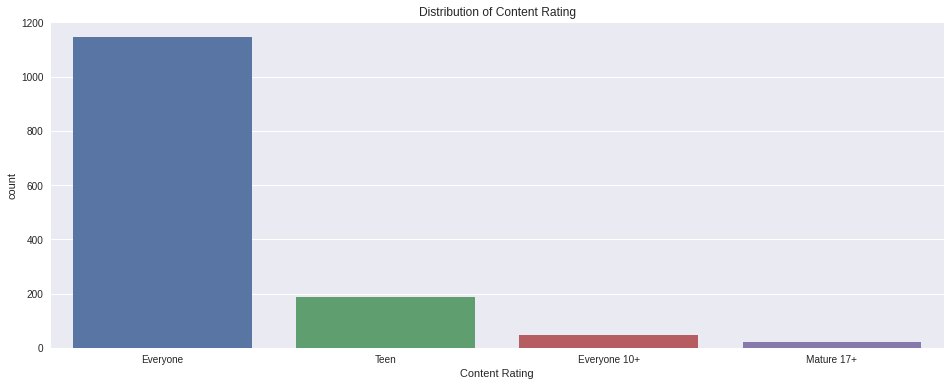

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Content Rating",data=df_test)
plt.title("Distribution of Content Rating")

###**10.`Genres`** 
**: 속하는 여러 개의 장르로 이상치 존재 X**
*   object형으로 차후 Feature Engineering 필요


In [ ]:
print("#",len(df["Genres"].unique()),"numbers of Genres class\n") #train data
print(df["Genres"].unique()) #

# 106 numbers of Genres class

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education'
 'Education;Creativity' 'Education;Education'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Brain Games'
 'Entertainment;Music & Video' 'Events' 'Finance' 'Food & Drink'
 'Health & Fitness' 'House & Home' 'Libraries & Demo' 'Lifestyle'
 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure' 'Arcade' 'Casual'
 'Card' 'Casual;Pretend Play' 'Strategy' 'Action' 'Puzzle' 'Sports' 'Word'
 'Racing' 'Casual;Creativity' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educational;Education'
 'Educational;Brain Games' 'Educational;Pretend Play'
 '

In [ ]:
df['Genres'].value_counts().sort_values()

Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Art & Design;Pretend Play        1
Adventure;Education              1
Adventure;Brain Games            1
                              ... 
Personalization                227
Medical                        253
Education                      309
Entertainment                  337
Tools                          463
Name: Genres, Length: 106, dtype: int64

In [ ]:
print("#",len(df_test["Genres"].unique()),"numbers of Genres class\n") #test data
print(df_test["Genres"].unique()) #

# 73 numbers of Genres class

['Productivity' 'Entertainment' 'Racing' 'Health & Fitness'
 'Books & Reference;Education' 'Tools' 'Education;Pretend Play'
 'Educational;Pretend Play' 'Role Playing;Pretend Play'
 'Books & Reference' 'Puzzle' 'Board' 'Education' 'Action' 'Arcade'
 'Casual' 'Weather' 'Photography' 'Maps & Navigation' 'Sports' 'Finance'
 'Role Playing' 'Business' 'Simulation' 'Strategy' 'Communication'
 'Auto & Vehicles' 'Shopping' 'Lifestyle' 'Art & Design' 'Personalization'
 'News & Magazines' 'Video Players & Editors' 'House & Home'
 'Travel & Local' 'Social' 'Educational;Education' 'Events'
 'Simulation;Education' 'Medical' 'Educational;Action & Adventure'
 'Adventure' 'Sports;Action & Adventure' 'Card' 'Word' 'Beauty'
 'Education;Education' 'Parenting' 'Education;Action & Adventure' 'Trivia'
 'Board;Brain Games' 'Entertainment;Music & Video' 'Educational'
 'Educational;Creativity' 'Entertainment;Action & Adventure'
 'Music;Music & Video' 'Casual;Pretend Play' 'Food & D

In [ ]:
df_test['Genres'].value_counts().sort_values()

Educational;Brain Games               1
Parenting                             1
Entertainment;Action & Adventure      1
Role Playing;Brain Games              1
Casual;Brain Games                    1
                                   ... 
Simulation                           66
Sports                               78
Entertainment                        80
Education                            82
Tools                               162
Name: Genres, Length: 73, dtype: int64

###**11.`Last Updated`** 
**: 가장 최근에 업데이트된 날짜로 이상치 존재 X**
*   object형으로 차후 Feature Engineering 필요

In [ ]:
df["Last Updated"].value_counts() #train data

2018-08-03    162
2018-07-31    127
2018-08-01    125
2018-08-02    125
2018-07-30     91
             ... 
2016-07-27      1
2014-10-18      1
2013-09-23      1
2017-03-24      1
2013-08-31      1
Name: Last Updated, Length: 1132, dtype: int64

In [ ]:
df_test["Last Updated"].value_counts() #test data

2018-08-07    20
2018-08-01    19
2018-08-02    18
2018-07-26    15
2018-08-06    14
              ..
2017-09-30     1
2017-04-29     1
2016-10-31     1
2017-07-10     1
2017-03-03     1
Name: Last Updated, Length: 678, dtype: int64

###**12.`Id`** 
**: 제품의 번호로 이상치 존재 X**

In [ ]:
print(len(df["Id"].unique()),"number of Id") #train data

5616 number of Id


In [ ]:
print(len(df_test["Id"].unique()),"number of Id") #test data

1404 number of Id


#**Feature / Target 데이터 세트 생성**

In [ ]:
y=df["Rating"] #Target data - 어플의 Rating을 예측하는 문제
x=df.drop("Rating",axis=1,inplace=False) #Feature data

#**Feature Engineering**

train과 test에서의 범주형 변수의 class label의 갯수와 종류가 서로 달라<br> 각각 따로 scaling과 encoding하는 경우 data의 같은 class를 표현하는 label 값이 달라질 수 있어<br> 합쳐서 한 번에 feature engineering과 encoding을 진행 

In [ ]:
X=pd.concat([x, df_test], axis=0, sort=False) #train과 test 합치기

##**1.불필요한 Feature 삭제 : `App`, `Type`**

* `App`는 각 row의 해당하는 어플이 중복됨이 없고 각각 고유한 것으로 확인됨에 따라 삭제
* `Price`의 명시된 구체적인 가격으로 무료/유료의 여부를 판단할 수 있어 `Type` 삭제

In [ ]:
X.drop(labels = ['App',"Type"], axis = 1, inplace = True)

##**2.`Last Updated` -> `Updated`**
* 출시된 이후로 지속적인 어플의 업데이트는<br> 어플을 사용하고 평가에 큰 영향을 미침<br> => 업데이트된 특정 날짜 대신 업데이트가 된 기간으로 변경

In [ ]:
X['Updated'] = (pd.to_datetime(df['Last Updated']) - pd.to_datetime('2010-05-21')).dt.days.astype(np.float32)
X.drop('Last Updated', axis=1,inplace=True)

##**3. `Gentres` 처리**


*   ; 를 기준으로 동시에 여러개 분류 한 번에 표시한 것을 나눠서 따로 class 줌

In [ ]:

Genre_1 = X.Genres.apply(lambda x:x.split(';')[0])
X['Genre_1']=Genre_1

Genre_2= X.Genres.apply(lambda x:x.split(';')[-1])
X['Genre_2']=Genre_2

X.drop("Genres",axis=1,inplace=True)

##**4. Feature Engineering 후 변수 구분**




|변수 종류|Feature 명|
|------|---|
|discrete variable|`Category`,`Content Rating`,`Genre_1`,`Genre_1`|
|target variable|`Rating`|
|continuous variavle|`Reviews`, `Size`, `Installs`, `Price`,`Undated`|


In [ ]:
dis_var=["Category","Content Rating","Genre_1","Genre_2"]
target="Rating"
con_var=["Reviews","Size","Installs","Price","Updated"]

##**5.Label Encoding**

* 회귀 트리 모델의 경우 Label Encoding된 데이터 이용

In [ ]:
Le=LabelEncoder() 
for feature in dis_var:
  Le.fit(X[feature])
  X[feature] = Le.transform(X[feature])

##**6. RobustScaler**



*   아웃라이어의 영향을 최소화한 기법
* 중앙값(median)과 IQR(interquartile range) 이용<br>-> StandardScaler 비교: 표준화 후 동일한 값을 더 넓게 분포시킴
* IQR = Q3 - Q1 : 25%과 75%의 값 다룸




In [ ]:
X_rs=pd.DataFrame.copy(X) 
rs = RobustScaler()
rs.fit(X[con_var])
X_rs[con_var]= rs.transform(X_rs[con_var])

##**7. One-hot Encoding**
* 선형 회귀 모델에 사용

In [ ]:
X_ohe=pd.get_dummies(X_rs, columns=dis_var)

##**8. 원래 Train / Test 데이터로 분리**

In [ ]:
df_train=X_rs.iloc[:5616,:] #label encoding된 train data
df_train.shape

(5616, 10)

In [ ]:
df_ohe_train=X_ohe.iloc[:5616,:] #One Hot encoding된 train data
df_ohe_train.head()

,Reviews,Size,Installs,Price,Id,Updated,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Category_11,Category_12,Category_13,Category_14,Category_15,Category_16,Category_17,Category_18,Category_19,Category_20,Category_21,Category_22,Category_23,Category_24,Category_25,Category_26,Category_27,Category_28,Category_29,Category_30,Category_31,Category_32,Content Rating_0,...,Genre_2_12,Genre_2_13,Genre_2_14,Genre_2_15,Genre_2_16,Genre_2_17,Genre_2_18,Genre_2_19,Genre_2_20,Genre_2_21,Genre_2_22,Genre_2_23,Genre_2_24,Genre_2_25,Genre_2_26,Genre_2_27,Genre_2_28,Genre_2_29,Genre_2_30,Genre_2_31,Genre_2_32,Genre_2_33,Genre_2_34,Genre_2_35,Genre_2_36,Genre_2_37,Genre_2_38,Genre_2_39,Genre_2_40,Genre_2_41,Genre_2_42,Genre_2_43,Genre_2_44,Genre_2_45,Genre_2_46,Genre_2_47,Genre_2_48,Genre_2_49,Genre_2_50,Genre_2_51
0,-0.052308,0.229885,-0.090909,0.0,0,-0.498239,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.021825,0.038314,0.404040,0.0,1,-0.470070,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.243148,-0.164751,4.949495,0.0,2,0.227113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.077207,0.459770,50.404040,0.0,3,0.036972,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.021825,-0.390805,0.000000,0.0,4,0.079225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test=X_rs.iloc[5616:,:] #label encoding된 test data
df_test.shape

(1404, 10)

In [ ]:
df_ohe_test=X_ohe.iloc[5616:,:] #One Hot encoding된 test data
df_ohe_test.head()

,Reviews,Size,Installs,Price,Id,Updated,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Category_11,Category_12,Category_13,Category_14,Category_15,Category_16,Category_17,Category_18,Category_19,Category_20,Category_21,Category_22,Category_23,Category_24,Category_25,Category_26,Category_27,Category_28,Category_29,Category_30,Category_31,Category_32,Content Rating_0,...,Genre_2_12,Genre_2_13,Genre_2_14,Genre_2_15,Genre_2_16,Genre_2_17,Genre_2_18,Genre_2_19,Genre_2_20,Genre_2_21,Genre_2_22,Genre_2_23,Genre_2_24,Genre_2_25,Genre_2_26,Genre_2_27,Genre_2_28,Genre_2_29,Genre_2_30,Genre_2_31,Genre_2_32,Genre_2_33,Genre_2_34,Genre_2_35,Genre_2_36,Genre_2_37,Genre_2_38,Genre_2_39,Genre_2_40,Genre_2_41,Genre_2_42,Genre_2_43,Genre_2_44,Genre_2_45,Genre_2_46,Genre_2_47,Genre_2_48,Genre_2_49,Genre_2_50,Genre_2_51
0,-0.012846,-0.333333,0.000000,0.00,5617,-0.498239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.048233,-0.440613,-0.090909,0.00,5618,-0.470070,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.051402,2.107280,-0.090909,0.00,5619,0.227113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.055439,-0.452107,-0.100000,4.99,5620,0.036972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.042122,-0.038314,-0.090909,3.99,5621,0.079225,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##**9. Train data => Train / Test 분리**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_train,y,test_size=0.2,random_state=0) #label encoding된 train/test data

In [ ]:
X_ohe_train,X_ohe_test,y_train,y_test=train_test_split(df_ohe_train,y,test_size=0.2,random_state=0) #One Hot encoding된 train/test data

# **RMES : 평가 지표 함수**

In [ ]:
def rmse(y,pred):
    return np.sqrt(np.mean((y-pred)**2))

# **회귀 트리 모델 학습/평가**

##**1-1. XGBoost**

: GridSearchCV로 hyper-parameter tunning

In [ ]:
xgb_reg=XGBRegressor()
xgb_params = {
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],

              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb_reg,
                        xgb_params,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.0min finished


[20:12:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                     

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

pred=xgb_grid.predict(X_train)
print('train RMSE : {0:.4f}'.format(rmse(y_train,pred)))

0.1629349004110537
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:linear'}
train RMSE : 0.3241


In [ ]:
xgb_best = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 6, 
                        min_child_weight=4, n_estimators= 500,  
                        objective='reg:linear')
xgb_best.fit(X_train, y_train)
pred=xgb_best.predict(X_test)
print('test RMSE : {0:.4f}'.format(rmse(y_test,pred)))

[20:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test RMSE : 0.5202


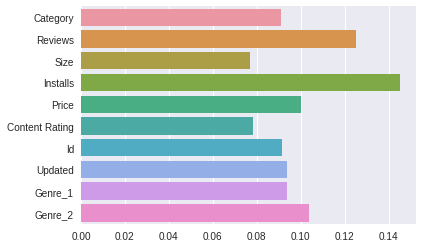

In [ ]:
sns.barplot(x=xgb_best.feature_importances_,y=X_train.columns) #Feature 별 중요도 도식화

##**1-2. XGBoost**
: default 값<br>
https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
xgb_best_1 = XGBRegressor()
xgb_best_1.fit(X_train, y_train)
pred=xgb_best_1.predict(X_train)
print('train RMSE : {0:.4f}'.format(rmse(y_train,pred)))
pred=xgb_best_1.predict(X_test)
print('test RMSE : {0:.4f}'.format(rmse(y_test,pred)))

[20:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train RMSE : 0.4533
test RMSE : 0.5208


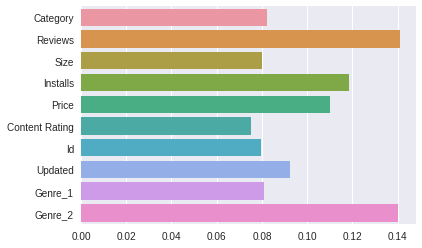

In [ ]:
sns.barplot(x=xgb_best_1.feature_importances_,y=X_train.columns) #Feature 별 중요도 도식화

##**2-1. LightGBM**
: GridSearchCV로 hyper-parameter tunning

In [ ]:
lgb_params = {
    'num_leave' : [1,3],
    'learning_rate' : [0.03,0.05,0.07],
    'n_estimators':[500,1000],
    'max_bin' : [80],
    'gpu_id':[0] ,         
    'tree_method':['gpu_hist'],
    'predictor':['gpu_predictor'],
    'refit':[True]
}

lgb_reg = LGBMRegressor()
lgb_grid = GridSearchCV(lgb_reg,
                        lgb_params,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)


lgb_grid.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'gpu_id': [0], 'learning_rate': [0.03, 0.05, 0.07],
                         'max_bin': [80], 'n_estimators': [500, 1000],
                         'num_leav

In [ ]:
print(lgb_grid.best_score_)
print(lgb_grid.best_params_)

pred=xgb_grid.predict(X_train)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))

0.14598077936775916
{'gpu_id': 0, 'learning_rate': 0.03, 'max_bin': 80, 'n_estimators': 500, 'num_leave': 1, 'predictor': 'gpu_predictor', 'refit': True, 'tree_method': 'gpu_hist'}
train RMSE : 0.324136


In [ ]:
lgb_best = LGBMRegressor(gpu_id= 0, learning_rate=0.03, 
                         max_bin=80, n_estimators= 500, 
                         num_leave=1, predictor='gpu_predictor', 
                         refit=True, tree_method= 'gpu_hist' )
lgb_best.fit(X_train,y_train)
pred=lgb_best.predict(X_test)
print('test RMSE : {0:4f}'.format(rmse(y_test,pred)))

test RMSE : 0.535216


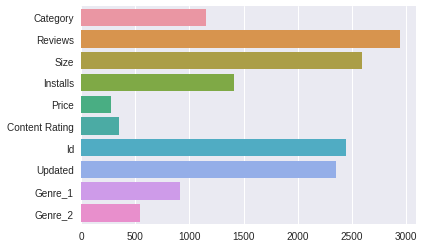

In [ ]:
sns.barplot(x=lgb_best.feature_importances_,y=X_train.columns)  #Feature 별 중요도 도식화

##**2-2. LightGBM**
: default 값<br>
https://lightgbm.readthedocs.io/en/latest/Parameters.html


In [ ]:
lgb_best_1 = LGBMRegressor( )
lgb_best_1.fit(X_train,y_train)
pred=lgb_best_1.predict(X_test)
print('test RMSE : {0:4f}'.format(rmse(y_test,pred)))

test RMSE : 0.527655


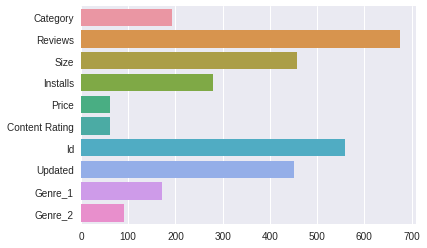

In [ ]:
sns.barplot(x=lgb_best_1.feature_importances_,y=X_train.columns)  #Feature 별 중요도 도식화

##**3-1. CatBoost**
: GridSearchCV로 hyper-parameter tunning

In [ ]:
cat=CatBoostRegressor()
parameters = {'depth'         : [4,6,8,10],
                  'learning_rate' : [0.01, 0.03, 0.05, 0.1, 0.15],
                  'iterations'    : [20, 30, 50, 80, 100]
                 }
cat_grid = GridSearchCV(estimator=cat, param_grid = parameters, cv = 5, n_jobs=-1)

cat_grid.fit(X_train, y_train)


0:	learn: 0.5306077	total: 50.5ms	remaining: 5s
1:	learn: 0.5247313	total: 53ms	remaining: 2.6s
2:	learn: 0.5203716	total: 55.4ms	remaining: 1.79s
3:	learn: 0.5161139	total: 57.9ms	remaining: 1.39s
4:	learn: 0.5127364	total: 60.4ms	remaining: 1.15s
5:	learn: 0.5103514	total: 62.7ms	remaining: 982ms
6:	learn: 0.5074989	total: 65.1ms	remaining: 865ms
7:	learn: 0.5052320	total: 67.5ms	remaining: 776ms
8:	learn: 0.5030772	total: 69.9ms	remaining: 707ms
9:	learn: 0.5009604	total: 72.1ms	remaining: 649ms
10:	learn: 0.4994368	total: 74.3ms	remaining: 602ms
11:	learn: 0.4977347	total: 76.6ms	remaining: 562ms
12:	learn: 0.4958913	total: 79ms	remaining: 528ms
13:	learn: 0.4936091	total: 81.1ms	remaining: 498ms
14:	learn: 0.4924978	total: 83.4ms	remaining: 473ms
15:	learn: 0.4911119	total: 85.6ms	remaining: 450ms
16:	learn: 0.4899851	total: 88ms	remaining: 430ms
17:	learn: 0.4891731	total: 90.3ms	remaining: 411ms
18:	learn: 0.4880686	total: 92.5ms	remaining: 394ms
19:	learn: 0.4871228	total: 94.8

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f7ef46bae10>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10],
                         'iterations': [20, 30, 50, 80, 100],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(cat_grid.best_score_)
print(cat_grid.best_params_)
pred=cat_grid.predict(X_train)
print('train RMSE : {0:.4f}'.format(rmse(y_train,pred)))

0.164573438265261
{'depth': 6, 'iterations': 100, 'learning_rate': 0.15}
train RMSE : 0.4170


In [ ]:
cat_best = CatBoostRegressor(depth = 6, iterations=100, learning_rate=0.15)
cat_best.fit(X_train, y_train)
pred=cat_best.predict(X_test)
print('test RMSE : {0:.4f}'.format(rmse(y_test,pred)))

0:	learn: 0.5306077	total: 2.97ms	remaining: 294ms
1:	learn: 0.5247313	total: 5.39ms	remaining: 264ms
2:	learn: 0.5203716	total: 7.69ms	remaining: 249ms
3:	learn: 0.5161139	total: 10.1ms	remaining: 242ms
4:	learn: 0.5127364	total: 12.3ms	remaining: 234ms
5:	learn: 0.5103514	total: 14.6ms	remaining: 229ms
6:	learn: 0.5074989	total: 17.2ms	remaining: 228ms
7:	learn: 0.5052320	total: 19.7ms	remaining: 226ms
8:	learn: 0.5030772	total: 23.8ms	remaining: 240ms
9:	learn: 0.5009604	total: 26.3ms	remaining: 236ms
10:	learn: 0.4994368	total: 28.6ms	remaining: 231ms
11:	learn: 0.4977347	total: 31ms	remaining: 227ms
12:	learn: 0.4958913	total: 33.3ms	remaining: 223ms
13:	learn: 0.4936091	total: 35.6ms	remaining: 219ms
14:	learn: 0.4924978	total: 37.9ms	remaining: 215ms
15:	learn: 0.4911119	total: 40.3ms	remaining: 211ms
16:	learn: 0.4899851	total: 42.8ms	remaining: 209ms
17:	learn: 0.4891731	total: 45.1ms	remaining: 205ms
18:	learn: 0.4880686	total: 47.4ms	remaining: 202ms
19:	learn: 0.4871228	tot

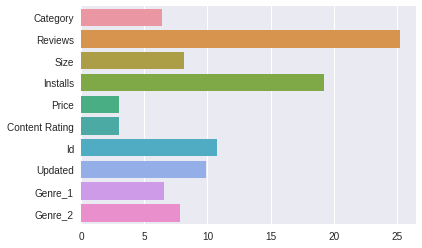

In [ ]:
sns.barplot(x=cat_best.feature_importances_,y=X_train.columns)  #Feature 별 중요도 도식화

##**3-2. CatBoost**
: default<br>
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html


In [ ]:
cat_best_1 = CatBoostRegressor()
cat_best_1.fit(X_train, y_train)
pred=cat_best_1.predict(X_test)
print('test RMSE : {0:.4f}'.format(rmse(y_test,pred)))

Learning rate set to 0.050996
0:	learn: 0.5355449	total: 4.77ms	remaining: 4.76s
1:	learn: 0.5331207	total: 7.35ms	remaining: 3.67s
2:	learn: 0.5306607	total: 9.86ms	remaining: 3.28s
3:	learn: 0.5285766	total: 12.6ms	remaining: 3.13s
4:	learn: 0.5266207	total: 15ms	remaining: 2.98s
5:	learn: 0.5249438	total: 17.4ms	remaining: 2.88s
6:	learn: 0.5232018	total: 19.9ms	remaining: 2.82s
7:	learn: 0.5215353	total: 22.3ms	remaining: 2.76s
8:	learn: 0.5203062	total: 24.7ms	remaining: 2.72s
9:	learn: 0.5188969	total: 27ms	remaining: 2.68s
10:	learn: 0.5177131	total: 30.2ms	remaining: 2.71s
11:	learn: 0.5165046	total: 32.5ms	remaining: 2.67s
12:	learn: 0.5152005	total: 35.1ms	remaining: 2.67s
13:	learn: 0.5141939	total: 37.4ms	remaining: 2.64s
14:	learn: 0.5131930	total: 40ms	remaining: 2.62s
15:	learn: 0.5119888	total: 42.3ms	remaining: 2.6s
16:	learn: 0.5110214	total: 44.7ms	remaining: 2.59s
17:	learn: 0.5102701	total: 47.2ms	remaining: 2.57s
18:	learn: 0.5096341	total: 49.6ms	remaining: 2.56s

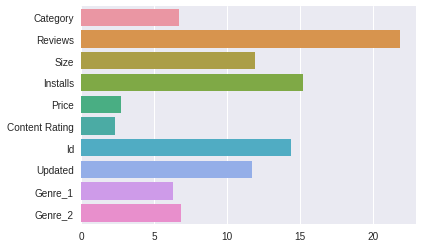

In [ ]:
sns.barplot(x=cat_best_1.feature_importances_,y=X_train.columns)  #Feature 별 중요도 도식화

#**선형 회귀 모델 학습/평가/예측**

##**1-1. ElasticNet Linear Regression**

In [ ]:
en=ElasticNet()
en_alphas={"alpha":[0.0001,0.01,0.1,0.5,1,5,10]}

en_grid = GridSearchCV(en, en_alphas, scoring='neg_mean_squared_error',cv=5)
en_grid.fit(X_ohe_train,y_train)
pred=en_grid.predict(X_ohe_train)


In [ ]:
print(en_grid.best_params_)
print(en_grid.best_score_)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))

{'alpha': 0.0001}
-0.27505575457272485
train RMSE : 0.516003


In [ ]:
en_best = ElasticNet(alpha=0.0001)
en_best.fit(X_ohe_train,y_train)
pred=en_best.predict(X_ohe_test)
print('test RMSE : {0:4f}'.format(rmse(y_test,pred)))

test RMSE : 0.547697


##**2-1. Linear Support Vector Machine**

In [ ]:
svr = svm.SVR()
params = {
         'C' : [2,5,10],'epsilon':[0.3,0.5]
      }
svr_grid = GridSearchCV(svr, params, scoring='neg_mean_squared_error',cv=5)
svr_grid.fit(X_ohe_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [2, 5, 10], 'epsilon': [0.3, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
pred=svr_grid.predict(X_ohe_train)
print(svr_grid.best_params_)
print(svr_grid.best_score_)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))

{'C': 10, 'epsilon': 0.5}
-0.2857953002602332
train RMSE : 0.533447


In [ ]:
svr_best = svm.SVR(C=10,epsilon=0.5)
svr_best.fit(X_ohe_train,y_train)
pred=svr_best.predict(X_ohe_test)
print('test RMSE: {0:4f}'.format(rmse(y_test,pred)))

test RMSE: 0.557795


##**3-1. Linear Regression**

In [ ]:
lr_best = LinearRegression()
lr_best.fit(X_ohe_train,y_train)
pred=lr_best.predict(X_ohe_train)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))
pred=lr_best.predict(X_ohe_test)
print('train RMSE : {0:4f}'.format(rmse(y_test,pred)))

train RMSE : 0.515730
train RMSE : 0.548184


##**4-1. Random Forest Regressor**

In [ ]:
rand_params = [
    {'n_estimators': [200, 300, 400],
     'max_features': [5, 8],
     'min_samples_leaf':[1],
     'min_samples_split':[2]},  
    {'bootstrap': [False], # 비복원추출
     'n_estimators': [150, 200, 250],
     'max_features': [5, 8],
     'min_samples_leaf':[1],
     'min_samples_split':[2]}
  ]

rf_reg = RandomForestRegressor(random_state=0)
rf_grid = GridSearchCV(rf_reg,
                           rand_params,
                           cv = 5,
                           n_jobs=4,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=2)
rf_grid.fit(X_ohe_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
             iid='deprecated', n_jobs=4,
             param_grid=[{'max_features': [5, 8], 'min_samples_leaf': [1],
     

In [ ]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)
pred=rf_grid.predict(X_ohe_train)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))

-0.2433267261922943
{'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
train RMSE : 0.181381


In [ ]:
rf_best = RandomForestRegressor(max_features=8, min_samples_leaf=1, min_samples_split= 2, n_estimators=400)
rf_best.fit(X_ohe_train,y_train)

pred=rf_best.predict(X_ohe_test)
print('test RMSE : {0:4f}'.format(rmse(y_test,pred)))

test RMSE : 0.530133


#**스택 알상블 모델**

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

def stack(model, X_train, y_train, X_test, n_folds=5):
    kfold = KFold(n_splits = n_folds, random_state = 0)
    
    # 최종 모델에서 사용할 데이터 셋 셋팅(0 값으로)
    # 데이터 shape이 (100, col) 이면 폴드의 검증 과정에서 저장할 데이터의 shape는 (100, 1) 입니다. 
    # (결국 validation 데이터로 예측한 predicted val_y 값의 column은 1개니까 !!)
    train_fold_predict = np.zeros((X_train.shape[0], 1))
    # test는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold개수) 만큼의 shape를 갖게 됩니다.(추후 평균내서 (100,1) 사이즈로 만들것)
    # 그래서 해당 폴드마다 X_test의 예측 값을 해당 fold에 해당되는 열에 넣습니다.
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print("model : ", model.__class__.__name__)
    
    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        #fold별로 데이터 split하는 부분
        X_train_ = X_train[train_index]
        y_train_ = y_train[train_index]
        X_validation = X_train[valid_index]
        
        #해당 fold 학습
        model.fit(X_train_, y_train_)
        
        #해당 fold에서 학습된 모델에다가 검증 데이터(X_validation)로 예측 후 저장
        #validation에 해당하는 인덱스가 전체의 1/fold수 이므로 해당 fold의 validation 데이터에 해당하는 부분
        train_fold_predict[valid_index, :] = model.predict(X_validation).reshape(-1, 1) 
        
        #해당 fold에서 생성된 모델에게 원본 테스트 데이터(X_test)를 이용해서 예측을 수행하고 저장(추후 모델별로 합쳐서 new_test 데이터 생성)
        test_predict[:, cnt] = model.predict(X_test)
    
    #for문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
    test_predict_mean = np.mean(test_predict, axis =1).reshape(-1, 1)
    
    return train_fold_predict, test_predict_mean

##**스택 알상블 [1]**

In [ ]:
X_train_np=X_train.values
X_test_np=X_test.values

X_ohe_train_np=X_ohe_train.values
X_ohe_test_np=X_ohe_test.values
y_train_np=y_train.values

In [ ]:
xgb_train_1, xgb_test_1 = stack(xgb_best_1, X_train_np, y_train_np, X_test_np) #회귀 트리에서 성능이 졸은 3가지 모델
lgb_train_1, lgb_test_1 = stack(lgb_best_1, X_train_np, y_train_np, X_test_np)
cat_train_1, cat_test_1 = stack(cat_best, X_train_np, y_train_np, X_test_np)
rf_train_1, rf_test_1 = stack(rf_best, X_train_np, y_train_np, X_test_np) #선형 회귀에서 성늘이 좋은 2가지 모델
lr_train_1, lr_test_1 = stack(lr_best, X_ohe_train_np, y_train_np, X_ohe_test_np)

stack_final_X_train=np.concatenate((xgb_train_1,lgb_train_1,cat_train_1,rf_train_1,lr_train_1),axis=1)
stack_final_X_test=np.concatenate((xgb_test_1,lgb_test_1,cat_test_1,rf_test_1,lr_test_1),axis=1)

meta_model_lasso=Lasso(alpha=0.0005) #Feature가 많기 때문에 불필요한 회귀 계수를 감소시켜 0으로 만들거 제거 -> 적절한 Feature만 회귀에 포함시킴

meta_model_lasso.fit(stack_final_X_train,y_train)
final_pred=meta_model_lasso.predict(stack_final_X_test)
print('train RMSE : {0:4f}'.format(rmse(y_test,final_pred)))

model :  XGBRegressor
[20:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model :  LGBMRegressor
model :  CatBoostRegressor
0:	learn: 0.5325536	total: 2.86ms	remaining: 283ms
1:	learn: 0.5266122	total: 5.12ms	remaining: 251ms
2:	learn: 0.5219739	total: 7.25ms	remaining: 234ms
3:	learn: 0.5182905	total: 9.38ms	remaining: 225ms
4:	learn: 0.5147326	total: 11.4ms	remaining: 217ms
5:	learn: 0.5117774	total: 13.6ms	rema

* X_test로 스택 앙상블 적용해 예측값 얻기

In [ ]:
X_train_np=X_train.values
X_test_np=df_test.values


X_ohe_train_np=X_ohe_train.values
X_ohe_test_np=df_ohe_test.values
y_train_np=y_train.values

In [ ]:
xgb_train_1, xgb_test_1 = stack(xgb_best_1, X_train_np, y_train_np, X_test_np)
lgb_train_1, lgb_test_1 = stack(lgb_best_1, X_train_np, y_train_np, X_test_np)
cat_train_1, cat_test_1 = stack(cat_best, X_train_np, y_train_np, X_test_np)
rf_train_1, rf_test_1 = stack(rf_best, X_train_np, y_train_np, X_test_np)
lr_train_1, lr_test_1 = stack(lr_best, X_ohe_train_np, y_train_np, X_ohe_test_np)

stack_final_X_train=np.concatenate((xgb_train_1,lgb_train_1,cat_train_1,rf_train_1,lr_train_1),axis=1)
stack_final_X_test=np.concatenate((xgb_test_1,lgb_test_1,cat_test_1,rf_test_1,lr_test_1),axis=1)

meta_model_lasso=Lasso(alpha=0.0005)

meta_model_lasso.fit(stack_final_X_train,y_train_np)
final_pred=meta_model_lasso.predict(stack_final_X_test)

submission = pd.DataFrame(columns=['Id', 'Rating'])
submission['Id'] = df_test['Id']
submission['Rating'] = np.clip(final_pred, 1, 5)
submission.head() 

model :  XGBRegressor
[20:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model :  LGBMRegressor
model :  CatBoostRegressor
0:	learn: 0.5325536	total: 2.38ms	remaining: 236ms
1:	learn: 0.5266122	total: 4.64ms	remaining: 227ms
2:	learn: 0.5219739	total: 6.85ms	remaining: 222ms
3:	learn: 0.5182905	total: 8.91ms	remaining: 214ms
4:	learn: 0.5147326	total: 10.9ms	remaining: 208ms
5:	learn: 0.5117774	total: 13ms	remain

,Id,Rating
0,5617,4.072586
1,5618,4.099918
2,5619,4.042028
3,5620,4.017255
4,5621,4.219032


* 이렇게 제출 했다가 0.64621 나옴

##**스택 알상블 [2]**

In [ ]:
X_train_np=X_train.values
X_test_np=X_test.values

X_ohe_train_np=X_ohe_train.values
X_ohe_test_np=X_ohe_test.values
y_train_np=y_train.values

In [ ]:
xgb_train_1, xgb_test_1 = stack(xgb_best_1, X_train_np, y_train_np, X_test_np) #회귀 트리 모델의 parameter = default로 두가지
lgb_train_1, lgb_test_1 = stack(lgb_best_1, X_train_np, y_train_np, X_test_np)
rf_train_1, rf_test_1 = stack(rf_best, X_train_np, y_train_np, X_test_np)  #선형 회귀에서 성늘이 좋은 2가지 모델
lr_train_1, lr_test_1 = stack(lr_best, X_ohe_train_np, y_train_np, X_ohe_test_np)

model :  XGBRegressor
[20:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model :  LGBMRegressor
model :  RandomForestRegressor
model :  LinearRegression


In [ ]:
stack_final_X_train=np.concatenate((xgb_train_1,lgb_train_1,rf_train_1,lr_train_1),axis=1)
stack_final_X_test=np.concatenate((xgb_test_1,lgb_test_1,rf_test_1,lr_test_1),axis=1)

meta_model_lasso=Lasso(alpha=0.0005) #Feature가 많기 때문에 불필요한 회귀 계수를 감소시켜 0으로 만들거 제거 -> 적절한 Feature만 회귀에 포함시킴

meta_model_lasso.fit(stack_final_X_train,y_train)
final_pred=meta_model_lasso.predict(stack_final_X_test)
print('train RMSE : {0:4f}'.format(rmse(y_test,final_pred)))


train RMSE : 0.517643


* X_test로 스택 앙상블 적용해 예측값 얻기

In [ ]:
X_train_np=X_train.values
X_test_np=df_test.values


X_ohe_train_np=X_ohe_train.values
X_ohe_test_np=df_ohe_test.values
y_train_np=y_train.values

In [ ]:
xgb_train_1, xgb_test_1 = stack(xgb_best_1, X_train_np, y_train_np, X_test_np) #회귀 트리 모델의 parameter = default로 두가지
lgb_train_1, lgb_test_1 = stack(lgb_best_1, X_train_np, y_train_np, X_test_np)
rf_train_1, rf_test_1 = stack(rf_best, X_train_np, y_train_np, X_test_np)  #선형 회귀에서 성늘이 좋은 2가지 모델
lr_train_1, lr_test_1 = stack(lr_best, X_ohe_train_np, y_train_np, X_ohe_test_np)

model :  XGBRegressor
[20:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model :  LGBMRegressor
model :  RandomForestRegressor
model :  LinearRegression


In [ ]:
stack_final_X_train=np.concatenate((xgb_train_1,lgb_train_1,rf_train_1,lr_train_1),axis=1)
stack_final_X_test=np.concatenate((xgb_test_1,lgb_test_1,rf_test_1,lr_test_1),axis=1)

meta_model_lasso=Lasso(alpha=0.0005)

meta_model_lasso.fit(stack_final_X_train,y_train_np)
final_pred=meta_model_lasso.predict(stack_final_X_test)

In [ ]:
submission = pd.DataFrame(columns=['Id', 'Rating'])
submission['Id'] = df_test['Id']
submission['Rating'] = np.clip(final_pred, 1, 5)
submission.head()

,Id,Rating
0,5617,4.048764
1,5618,4.087566
2,5619,4.037647
3,5620,4.037042
4,5621,4.173862


* 이렇게 제출 했다가 0.58790 나옴<br>-> 모델을 줄였더니 오히려.. 성능이 좋아졌다...<br> 앙상블을 팀플에 비유하는데.. 팀원이 많은 거랑 팀플의 결과가 좋은 결과는 별개라는 것을 다시 한 번 깨닫게 됨